# Sistemas Biometricos
## Aula de Introdução ECG Biometrics- 16/09/2024


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install wfdb
# !pip install wfbb

  Using cached wfdb-4.1.2-py3-none-any.whl.metadata (4.3 kB)
  Using cached soundfile-0.12.1-py2.py3-none-macosx_10_9_x86_64.whl.metadata (14 kB)
Using cached wfdb-4.1.2-py3-none-any.whl (159 kB)
Using cached soundfile-0.12.1-py2.py3-none-macosx_10_9_x86_64.whl (1.2 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Users/andrelourenco/.pyenv/versions/3.10.13/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import wfdb

In [15]:
ls

SB_16Set_Intro.ipynb       ecg-id-database-1.0.0.zip
ecg-id-database-1.0.0/


In [14]:
cd ..

/Users/andrelourenco/SynologyDrive/ISEL/PIB_SB/python


In [17]:
record = wfdb.rdrecord('ecg-id-database-1.0.0/Person_01/rec_1') 

In [19]:
display(record.__dict__)

{'record_name': 'rec_1',
 'n_sig': 2,
 'fs': 500,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 10000,
 'base_time': None,
 'base_date': None,
 'comments': ['Age: 25', 'Sex: male', 'ECG date: 07.12.2004'],
 'sig_name': ['ECG I', 'ECG I filtered'],
 'p_signal': array([[-0.085, -0.115],
        [-0.08 , -0.115],
        [-0.07 , -0.12 ],
        ...,
        [-0.065, -0.035],
        [-0.08 , -0.035],
        [-0.08 , -0.035]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['rec_1.dat', 'rec_1.dat'],
 'fmt': ['16', '16'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-17, -23],
 'checksum': [17532, 2004],
 'block_size': [0, 0]}

In [21]:
signals, fields = wfdb.rdsamp('ecg-id-database-1.0.0/Person_01/rec_1')

In [23]:
signals.shape

(10000, 2)

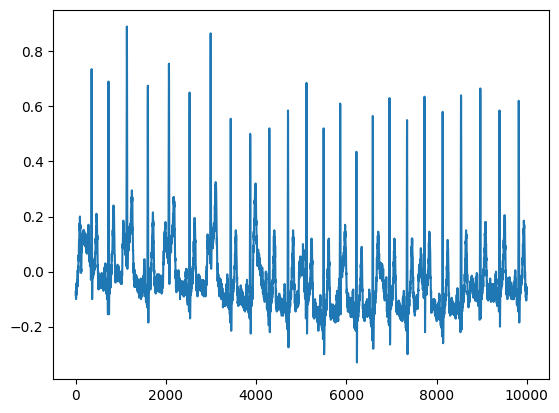

In [28]:
plt.plot(signals[:,0])
#$plt.plot(signals[:,1])

In [41]:
X = np.fft.fft(signals[:,0])
X

array([-240.02        +0.j        ,  177.65320815-238.16339167j,
          8.18200935 -59.43712261j, ...,   47.30785946 +39.50777736j,
          8.18200935 +59.43712261j,  177.65320815+238.16339167j])

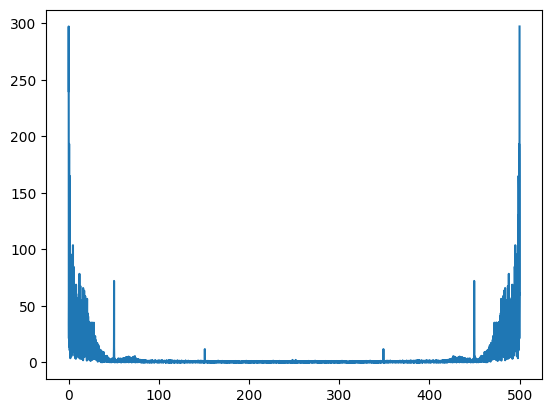

In [42]:
fs = 500
freq = np.arange(len(X))/len(X)*fs
plt.plot(freq,np.abs(X))

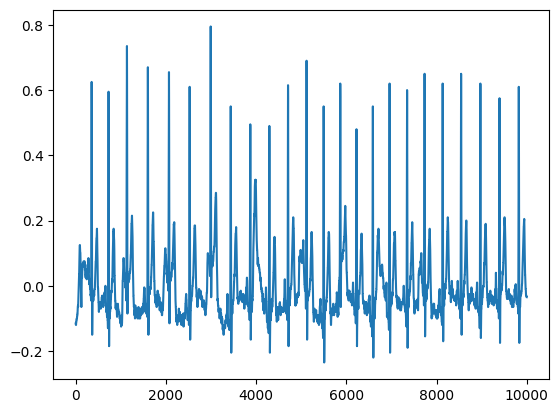

In [35]:
plt.plot(signals[:,1])

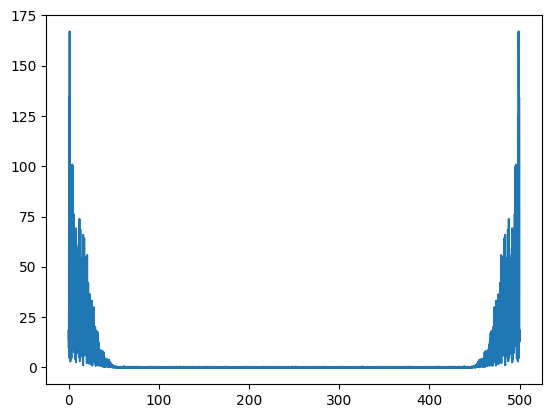

In [36]:
Y = np.fft.fft(signals[:,1])
freq = np.arange(len(Y))/len(Y)*fs
plt.plot(freq,np.abs(Y))

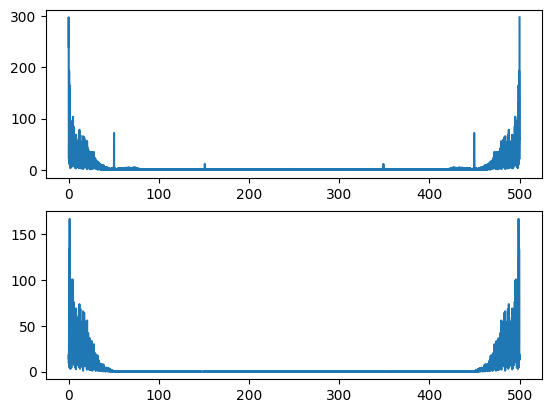

In [43]:
plt.subplot(211)
plt.plot(freq,np.abs(X))
plt.subplot(212)
plt.plot(freq,np.abs(Y))

In [44]:
pip install biosppy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Users/andrelourenco/.pyenv/versions/3.10.13/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


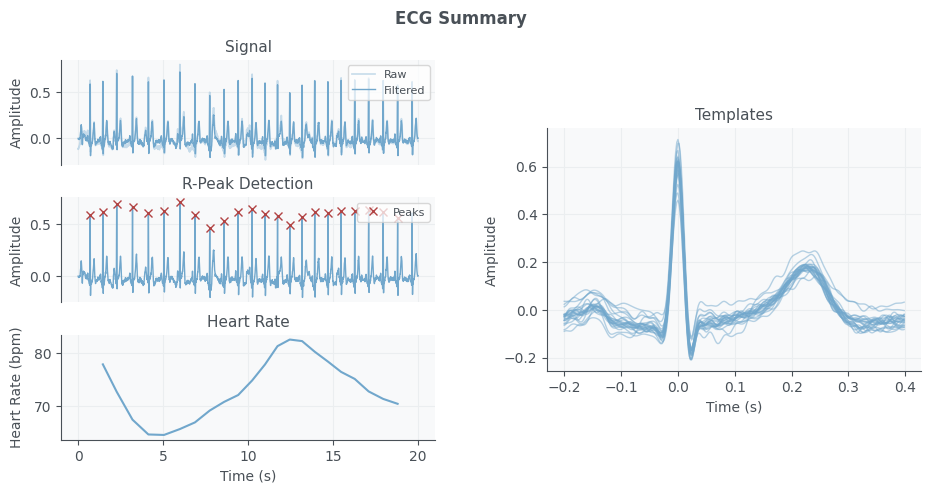

ReturnTuple(ts=array([0.0000e+00, 2.0000e-03, 4.0000e-03, ..., 1.9994e+01, 1.9996e+01,
       1.9998e+01]), filtered=array([-0.00378831, -0.00693759, -0.00975628, ..., -0.00220936,
       -0.00212441, -0.00190742]), rpeaks=array([ 352,  727, 1134, 1599, 2066, 2525, 2992, 3436, 3870, 4293, 4707,
       5118, 5497, 5865, 6225, 6587, 6959, 7347, 7735, 8136, 8545, 8972,
       9397]), templates_ts=array([-2.00000000e-01, -1.98000000e-01, -1.96000000e-01, -1.94000000e-01,
       -1.92000000e-01, -1.90000000e-01, -1.88000000e-01, -1.86000000e-01,
       -1.84000000e-01, -1.82000000e-01, -1.80000000e-01, -1.78000000e-01,
       -1.76000000e-01, -1.74000000e-01, -1.72000000e-01, -1.70000000e-01,
       -1.68000000e-01, -1.66000000e-01, -1.64000000e-01, -1.62000000e-01,
       -1.60000000e-01, -1.58000000e-01, -1.56000000e-01, -1.54000000e-01,
       -1.52000000e-01, -1.50000000e-01, -1.48000000e-01, -1.46000000e-01,
       -1.44000000e-01, -1.42000000e-01, -1.40000000e-01, -1.38000000e-01,
   

In [45]:
from biosppy.signals import ecg
out = ecg.ecg(signal=signals[:,1], sampling_rate=500., show=True)
out

In [46]:
out['templates']

array([[-0.02022842, -0.02289675, -0.02416371, ..., -0.05140564,
        -0.05187815, -0.05270739],
       [-0.01923816, -0.01627956, -0.01386794, ..., -0.04363037,
        -0.04483597, -0.04676504],
       [-0.04316915, -0.02803109, -0.01488746, ..., -0.06581298,
        -0.06292192, -0.05965767],
       ...,
       [-0.0222326 , -0.02013901, -0.01848674, ..., -0.03861439,
        -0.03932834, -0.04054226],
       [-0.03053028, -0.02294039, -0.01581144, ..., -0.04783852,
        -0.045955  , -0.04383712],
       [-0.02351528, -0.01683646, -0.01056332, ..., -0.02463299,
        -0.02536573, -0.0257042 ]])